In [1]:
from typing import TypedDict

class SomeState(TypedDict):
    attribute1 : str
    attribute2 : str

In [2]:
def some_function(state:SomeState) -> SomeState:
    state['attribute1'] = 'value changed by some_function'
    return state



In [4]:
!pip install langgraph

  Using cached msgpack-1.1.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.4 kB)
Using cached msgpack-1.1.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (401 kB)
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.21
    Uninstalling langchain-core-0.3.21:
      Successfully uninstalled langchain-core-0.3.21

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [9]:
from langgraph.graph import StateGraph 

graph = StateGraph(SomeState)

In [10]:
graph.add_node('node1',some_function)

In [11]:
from langgraph.graph import END

graph.add_edge('node1', END)

In [13]:
graph.set_entry_point('node1')

In [14]:
compiled_graph = graph.compile()

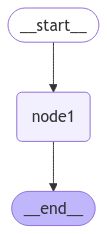

In [18]:
from IPython.display import Image
Image(compiled_graph.get_graph().draw_mermaid_png())

In [19]:
type(compiled_graph)

langgraph.graph.state.CompiledStateGraph

In [20]:
compiled_graph.invoke({'attribute1':'value1','attribute2':'value2'})

{'attribute1': 'value changed by some_function', 'attribute2': 'value2'}

In [1]:
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph,MessagesState, START, END
from langgraph.prebuilt import ToolNode
from langchain_community.tools import TavilySearchResults
from IPython.display import Image


In [2]:
llm = ChatOpenAI(model='gpt-4o-mini',temperature=0)

In [3]:
def should_continue(state :MessagesState)-> bool:
    messages = state['messages']
    last_message = messages[-1]
    if last_message.tool_calls:
        return 'tools'
    else:
        return END

In [4]:
def call_model(state:MessagesState):
    messages = state['messages']
    response = llm.invoke(messages)

    return {'messages':messages+[response]}

In [5]:
graph = StateGraph(MessagesState)

In [6]:
graph.add_node('agent',call_model)

In [7]:
search_tool = TavilySearchResults(max_results=5)

In [8]:
tools = [search_tool]
tool_node = ToolNode(tools)

In [9]:
graph.add_node('tools',tool_node)

In [10]:
graph.add_edge(START,'agent')

In [11]:
graph.add_conditional_edges('agent',should_continue)

In [12]:
graph.add_edge('tools','agent')

In [13]:
graph_compiled = graph.compile()

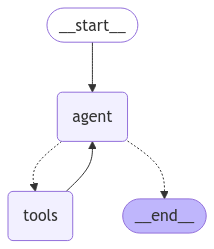

In [14]:
Image(graph_compiled.get_graph().draw_mermaid_png())

In [15]:
output = graph_compiled.invoke({'messages':[('user','write a simple report to use AI for productivity')]})

In [16]:
output

{'messages': [HumanMessage(content='write a simple report to use AI for productivity', additional_kwargs={}, response_metadata={}, id='a9109fbc-445e-43a2-9511-d23533a46e56'),
  AIMessage(content="# Report on Utilizing AI for Enhanced Productivity\n\n## Introduction\n\nIn today's fast-paced business environment, organizations are continually seeking ways to improve efficiency and productivity. Artificial Intelligence (AI) has emerged as a powerful tool that can streamline processes, enhance decision-making, and automate repetitive tasks. This report outlines the potential applications of AI to boost productivity across various sectors.\n\n## Benefits of AI for Productivity\n\n1. **Automation of Repetitive Tasks**: \n   - AI can automate mundane tasks such as data entry, scheduling, and email management, allowing employees to focus on more strategic activities.\n   - Tools like Robotic Process Automation (RPA) can handle high-volume, repetitive tasks with precision and speed.\n\n2. **Enh

In [17]:
from IPython.display import Markdown
Markdown(output['messages'][-1].content)

# Report on Utilizing AI for Enhanced Productivity

## Introduction

In today's fast-paced business environment, organizations are continually seeking ways to improve efficiency and productivity. Artificial Intelligence (AI) has emerged as a powerful tool that can streamline processes, enhance decision-making, and automate repetitive tasks. This report outlines the potential applications of AI to boost productivity across various sectors.

## Benefits of AI for Productivity

1. **Automation of Repetitive Tasks**: 
   - AI can automate mundane tasks such as data entry, scheduling, and email management, allowing employees to focus on more strategic activities.
   - Tools like Robotic Process Automation (RPA) can handle high-volume, repetitive tasks with precision and speed.

2. **Enhanced Decision-Making**:
   - AI algorithms can analyze vast amounts of data quickly, providing insights that help in making informed decisions.
   - Predictive analytics can forecast trends and outcomes, enabling proactive strategies.

3. **Improved Customer Service**:
   - AI-powered chatbots and virtual assistants can handle customer inquiries 24/7, improving response times and customer satisfaction.
   - Natural Language Processing (NLP) can analyze customer feedback to identify areas for improvement.

4. **Personalization**:
   - AI can analyze user behavior and preferences to deliver personalized experiences, whether in marketing, product recommendations, or customer interactions.
   - This tailored approach can lead to higher engagement and conversion rates.

5. **Enhanced Collaboration**:
   - AI tools can facilitate better communication and collaboration among team members, regardless of their location.
   - Platforms that integrate AI can help manage projects, track progress, and streamline workflows.

## Applications of AI in Various Sectors

1. **Healthcare**:
   - AI can assist in diagnosing diseases, predicting patient outcomes, and personalizing treatment plans.
   - Administrative tasks such as scheduling and billing can be automated, freeing up healthcare professionals to focus on patient care.

2. **Finance**:
   - AI algorithms can detect fraudulent transactions, assess credit risk, and automate trading processes.
   - Financial institutions can use AI for customer service through chatbots and virtual advisors.

3. **Manufacturing**:
   - AI can optimize supply chain management, predict equipment failures, and enhance quality control.
   - Robotics powered by AI can improve production efficiency and reduce human error.

4. **Retail**:
   - AI can analyze shopping patterns to optimize inventory management and enhance the customer shopping experience.
   - Personalized marketing campaigns driven by AI can increase sales and customer loyalty.

## Implementation Strategies

1. **Identify Key Areas for AI Integration**:
   - Conduct a thorough analysis of existing processes to identify tasks that can benefit from AI automation.

2. **Choose the Right Tools**:
   - Research and select AI tools that align with organizational goals and are user-friendly for employees.

3. **Train Employees**:
   - Provide training sessions to ensure employees understand how to use AI tools effectively and can adapt to new workflows.

4. **Monitor and Evaluate**:
   - Continuously monitor the impact of AI on productivity and make adjustments as necessary to optimize performance.

## Conclusion

The integration of AI into business processes presents a significant opportunity to enhance productivity across various sectors. By automating repetitive tasks, improving decision-making, and personalizing customer interactions, organizations can achieve greater efficiency and effectiveness. As AI technology continues to evolve, embracing its potential will be crucial for staying competitive in the modern marketplace.

## Recommendations

- Organizations should start small by implementing AI in specific areas and gradually expand its use as they become more comfortable with the technology.
- Collaboration with AI experts or consultants can help in selecting the right tools and strategies for successful implementation.
- Regularly assess the impact of AI on productivity and be open to adapting strategies based on feedback and results. 

---

This report serves as a foundational guide for organizations looking to leverage AI to enhance productivity. By understanding the benefits and applications of AI, businesses can make informed decisions that drive growth and efficiency.

In [18]:
from langchain_community.document_loaders import PyPDFLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OpenAIEmbeddings
from langchain_openai import ChatOpenAI

In [26]:
!pip install pypdf
!pip install chromadb


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pyproject_hooks-1.2.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached shellingham-1.5.4-py2.py3-none-any.whl.metadata (3.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.3/628.3 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 34.2 MB/s eta 0:00:00 0:00:01
Using cached shellingham-1.5.4-py2.py3-none-any.whl (9.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 32.5 MB/s eta 0:00:00
Using cached pyproject_hooks-1.2.0-py3-none-any.whl (10 kB)
  Created whe

In [21]:
file_path = 'assets_pdf/human-agent-collab-problem-solving.pdf'
loader = PyPDFLoader(file_path)
docs = loader.load()
docs[0]


Document(metadata={'source': 'assets_pdf/human-agent-collab-problem-solving.pdf', 'page': 0}, page_content='Large Language Model-based Human-Agent Collaboration\nfor Complex Task Solving\nXueyang Feng1,2∗, Zhi-Yuan Chen1,2∗, Yujia Qin3, Yankai Lin1,2†\nXu Chen1,2†, Zhiyuan Liu3, Ji-Rong Wen1,2\n1Gaoling School of Artificial Intelligence, Renmin University of China, Beijing, China\n2 Beijing Key Laboratory of Big Data Management and Analysis Methods, Beijing, China\n3 Department of Computer Science and Technology, Tsinghua University, Beijing, China\n{xueyangfeng, zhiyuanc2001, yankailin, xu.chen}@ruc.edu.cn\nAbstract\nIn recent developments within the research\ncommunity, the integration of Large Language\nModels (LLMs) in creating fully autonomous\nagents has garnered significant interest. De-\nspite this, LLM-based agents frequently demon-\nstrate notable shortcomings in adjusting to dy-\nnamic environments and fully grasping hu-\nman needs. In this work, we introduce the\nproblem of

In [22]:
len(docs)

16

In [23]:
docs[0:5]

[Document(metadata={'source': 'assets_pdf/human-agent-collab-problem-solving.pdf', 'page': 0}, page_content='Large Language Model-based Human-Agent Collaboration\nfor Complex Task Solving\nXueyang Feng1,2∗, Zhi-Yuan Chen1,2∗, Yujia Qin3, Yankai Lin1,2†\nXu Chen1,2†, Zhiyuan Liu3, Ji-Rong Wen1,2\n1Gaoling School of Artificial Intelligence, Renmin University of China, Beijing, China\n2 Beijing Key Laboratory of Big Data Management and Analysis Methods, Beijing, China\n3 Department of Computer Science and Technology, Tsinghua University, Beijing, China\n{xueyangfeng, zhiyuanc2001, yankailin, xu.chen}@ruc.edu.cn\nAbstract\nIn recent developments within the research\ncommunity, the integration of Large Language\nModels (LLMs) in creating fully autonomous\nagents has garnered significant interest. De-\nspite this, LLM-based agents frequently demon-\nstrate notable shortcomings in adjusting to dy-\nnamic environments and fully grasping hu-\nman needs. In this work, we introduce the\nproblem o

In [27]:
vectordb = Chroma.from_documents(documents = docs , collection_name = 'rag-chroma',embedding=OpenAIEmbeddings())

In [28]:
retriever= vectordb.as_retriever()

In [30]:
from langchain.tools.retriever import create_retriever_tool

In [31]:
retriever_tool = create_retriever_tool(retriever,'retrive_info_from_paper','Search and retriver information about a paper')

tools = [retriever_tool]

In [32]:
from typing import TypedDict, Annotated,Sequence
from langchain_core.messages import BaseMessage
from langgraph.graph import add_messages

In [34]:
class AgentState(TypedDict):
    messages:Annotated[Sequence[BaseMessage],add_messages]

In [35]:
def agent(state:AgentState):
    messages = state['messages']
    model = ChatOpenAI(model='gpt-4o-mini',temperature=0)
    model = model.bind_tools(tools)
    response = model.invoke(messages)

    return {'messages':[response]}


In [42]:
from langgraph.graph import StateGraph,MessagesState,START,END
from langgraph.prebuilt import ToolNode,tools_condition

graph = StateGraph(AgentState)
graph.add_node('agent',agent)
retriever_node = ToolNode([retriever_tool])
graph.add_node('retrieve',retriever_node)

In [43]:
graph.add_edge(START,'agent')
graph.add_conditional_edges('agent',tools_condition,{'tools':'retrieve',END:END})
graph.add_edge('retrieve','agent')

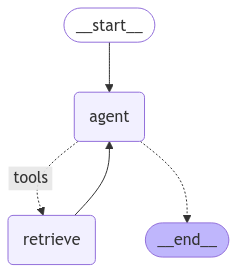

In [44]:
graph_compiled = graph.compile()
Image(graph_compiled.get_graph().draw_mermaid_png())

In [45]:
import pprint

inputs ={"messages":[("user","in this paper how do authors setup collboration between human and the LLM?")]}

In [46]:
for output in graph_compiled.stream(inputs):
    for key,value in output.items():
        pprint.pprint(f"output from node '{key}':")
        pprint.pprint("---")
        pprint.pprint(value , indent = 2 , width =80 , depth =None)
    pprint.pprint("\n---\n")

"output from node 'agent':"
'---'
{ 'messages': [ AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_2fMqc47UxuhM5Kh6V8i7wYxQ', 'function': {'arguments': '{"query":"collaboration between human and LLM"}', 'name': 'retrive_info_from_paper'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 76, 'total_tokens': 101, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_818c284075', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-f0beb9b9-37c8-4ea1-ae39-52927d9c5869-0', tool_calls=[{'name': 'retrive_info_from_paper', 'args': {'query': 'collaboration between human and LLM'}, 'id': 'call_2fMqc47UxuhM5Kh6V8i7wYxQ', 'type': 'tool_call'}], usage_metadata={'input_tokens': 76, 'output_tok